In [2]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv('USA_Housing.csv')

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

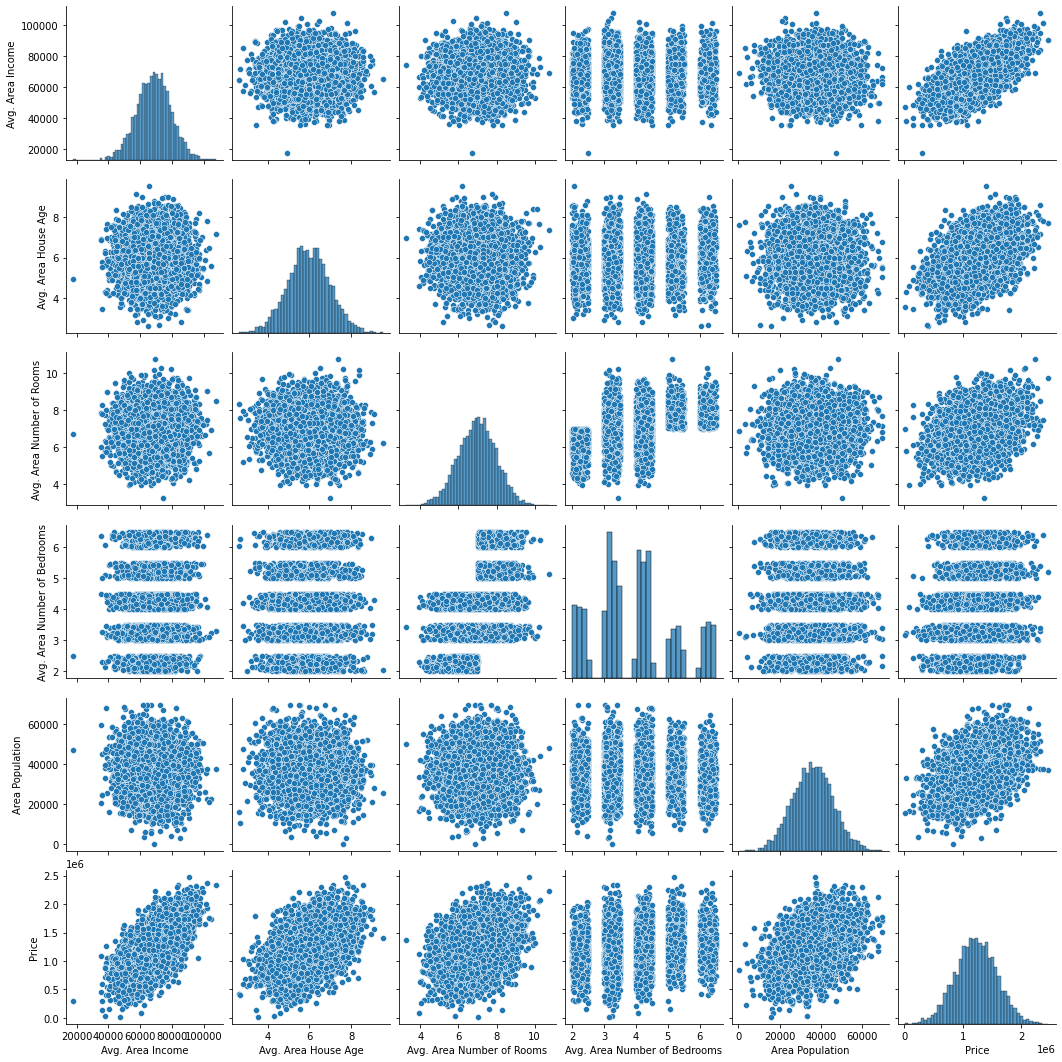

In [13]:
sns.pairplot(df)

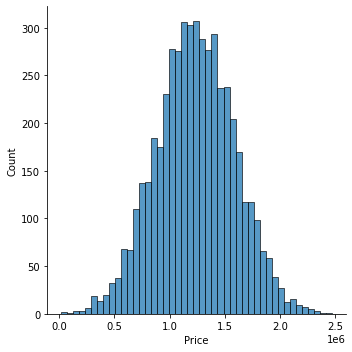

In [98]:
sns.displot(df['Price'])

<AxesSubplot:>

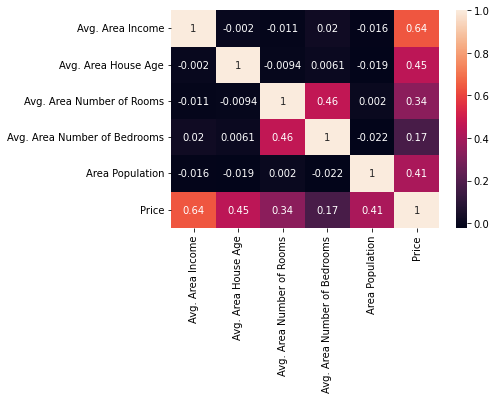

In [19]:
# df.corr()
sns.heatmap(df.corr(), annot=True)

In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [152]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [153]:
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [155]:
lm = LinearRegression()

In [156]:
lm.fit(X_train, y_train)

LinearRegression()

In [157]:
print(lm.intercept_)

-2640159.796852677


In [158]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [159]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [160]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])

In [161]:
cdf

,Coef
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [164]:
predictions = lm.predict(X_test)

In [165]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [167]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

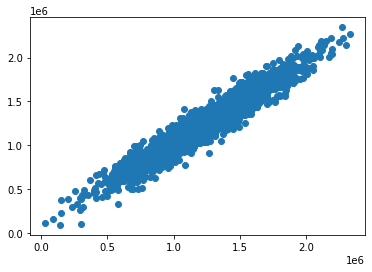

In [169]:
plt.scatter(y_test, predictions)

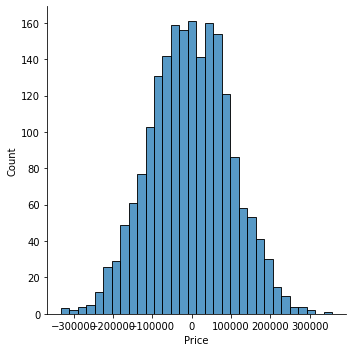

In [171]:
sns.displot((y_test-predictions))

In [172]:
from sklearn import metrics

In [173]:
metrics.mean_absolute_error(y_test, predictions)

82288.2225191495

In [174]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208988

In [175]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290901

# Boston Dataset

In [ ]:
from sklearn.datasets import load_boston

In [60]:
boston = load_boston()

In [92]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [130]:
headers=[x.split('  ')[-1].strip() for x in boston['DESCR'].split('\n')[12:26]]

In [133]:
boston_df = pd.DataFrame([dict(zip(headers, datum)) for datum in boston['data']])

In [134]:
boston_df.describe()

,per capita crime rate by town,"proportion of residential land zoned for lots over 25,000 sq.ft.",proportion of non-retail business acres per town,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),nitric oxides concentration (parts per 10 million),average number of rooms per dwelling,proportion of owner-occupied units built prior to 1940,weighted distances to five Boston employment centres,index of accessibility to radial highways,"full-value property-tax rate per $10,000",pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of black people by town,% lower status of the population
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [135]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   per capita crime rate by town                                          506 non-null    float64
 1   proportion of residential land zoned for lots over 25,000 sq.ft.       506 non-null    float64
 2   proportion of non-retail business acres per town                       506 non-null    float64
 3   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  506 non-null    float64
 4   nitric oxides concentration (parts per 10 million)                     506 non-null    float64
 5   average number of rooms per dwelling                                   506 non-null    float64
 6   proportion of owner-occupied units built prior to 1940                 506 non-null    flo

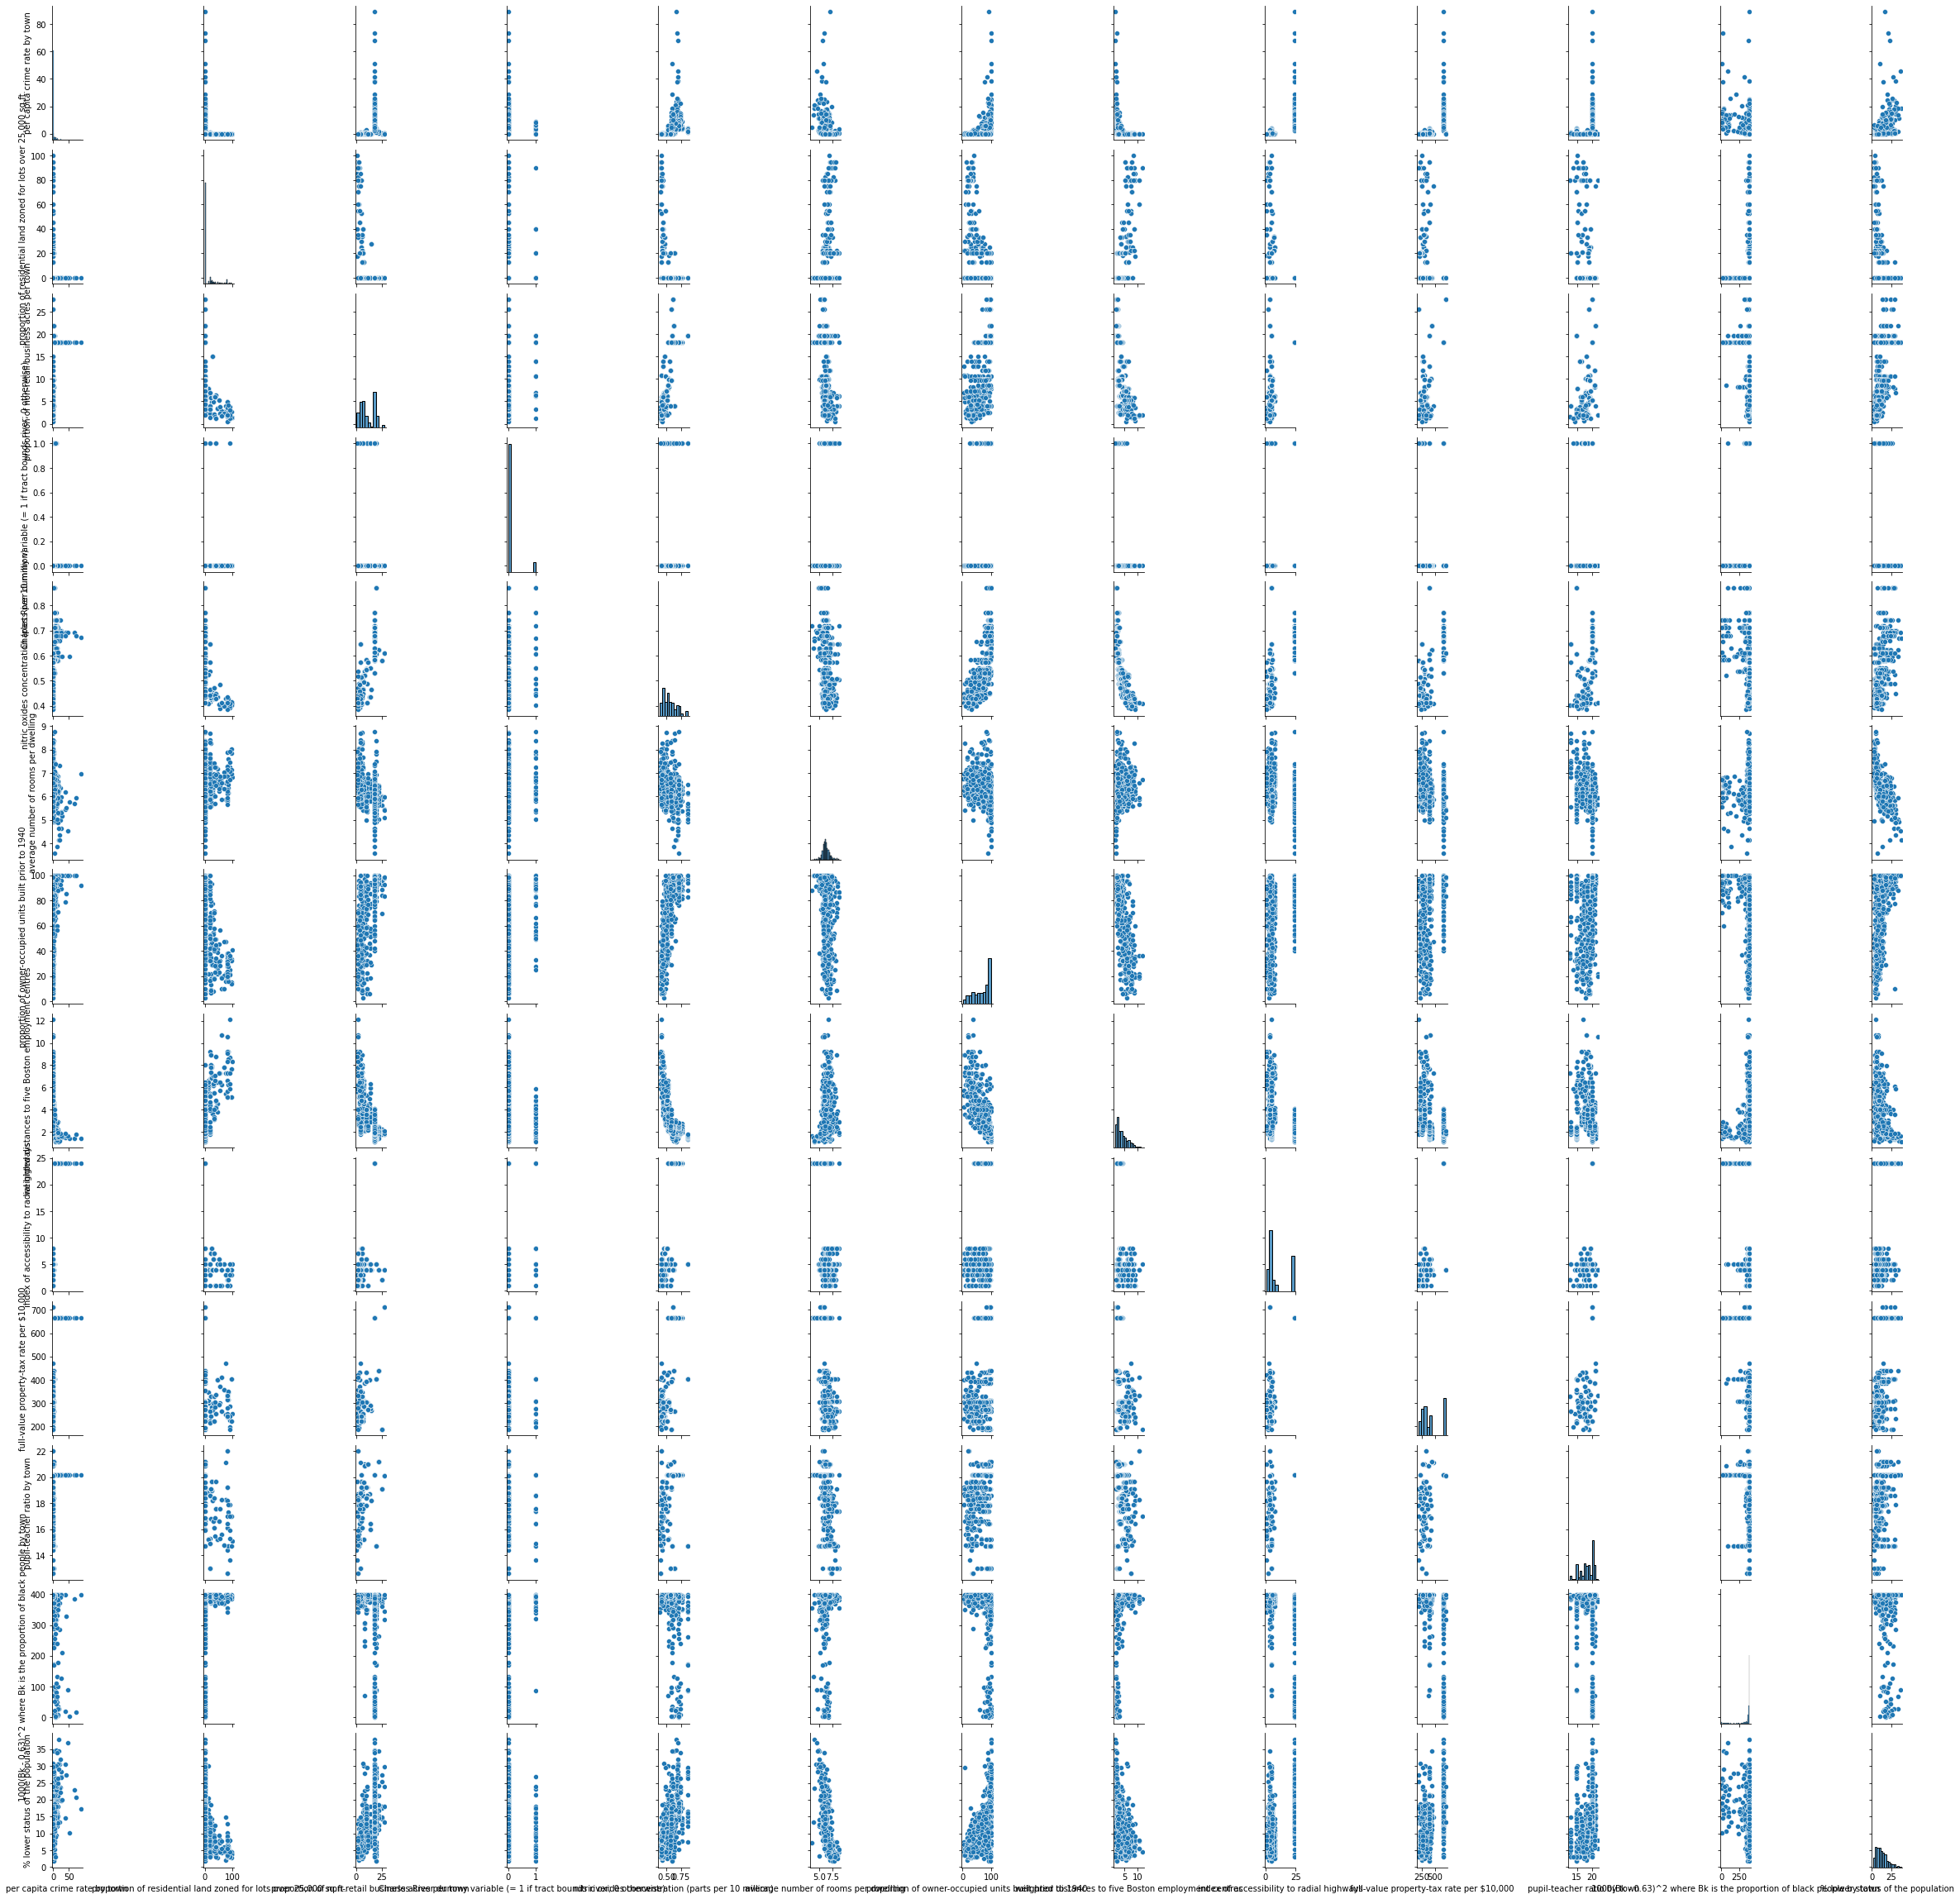

In [136]:
sns.pairplot(boston_df)

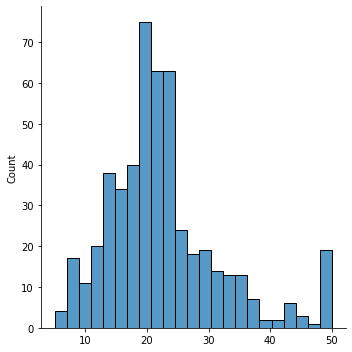

In [97]:
sns.displot(boston['target'])

In [138]:
boston_df.corr()

,per capita crime rate by town,"proportion of residential land zoned for lots over 25,000 sq.ft.",proportion of non-retail business acres per town,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),nitric oxides concentration (parts per 10 million),average number of rooms per dwelling,proportion of owner-occupied units built prior to 1940,weighted distances to five Boston employment centres,index of accessibility to radial highways,"full-value property-tax rate per $10,000",pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of black people by town,% lower status of the population
per capita crime rate by town,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
"proportion of residential land zoned for lots over 25,000 sq.ft.",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
proportion of non-retail business acres per town,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nitric oxides concentration (parts per 10 million),0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
average number of rooms per dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
proportion of owner-occupied units built prior to 1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
weighted distances to five Boston employment centres,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
index of accessibility to radial highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
"full-value property-tax rate per $10,000",0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

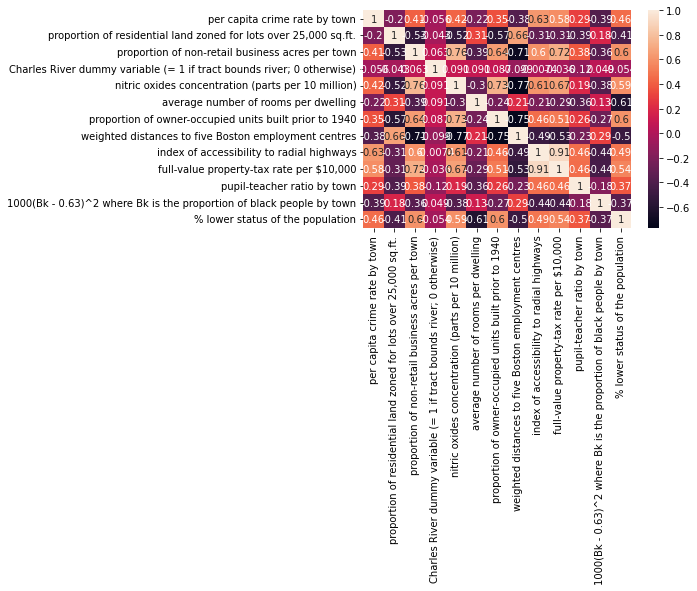

In [139]:
sns.heatmap(boston_df.corr(), annot=True)

In [176]:
X=boston_df

In [177]:
y=boston['target']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [179]:
X_train.describe()

,per capita crime rate by town,"proportion of residential land zoned for lots over 25,000 sq.ft.",proportion of non-retail business acres per town,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),nitric oxides concentration (parts per 10 million),average number of rooms per dwelling,proportion of owner-occupied units built prior to 1940,weighted distances to five Boston employment centres,index of accessibility to radial highways,"full-value property-tax rate per $10,000",pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of black people by town,% lower status of the population
count,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.79127,11.400990,11.236106,0.079208,0.556431,6.240997,68.929373,3.842242,9.561056,408.709571,18.389109,356.658020,13.124158
std,8.91233,23.712163,6.836160,0.270510,0.120068,0.672760,28.529649,2.144680,8.699665,168.467974,2.183225,91.419518,7.416232
min,0.00632,0.000000,0.460000,0.000000,0.392000,3.863000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,2.940000
25%,0.08577,0.000000,5.640000,0.000000,0.447000,5.870000,45.650000,2.108400,4.000000,279.500000,16.850000,375.990000,7.280000
50%,0.25387,0.000000,9.690000,0.000000,0.538000,6.167000,79.700000,3.317500,5.000000,330.000000,18.800000,391.450000,12.040000
75%,3.68339,12.500000,18.100000,0.000000,0.631000,6.582500,94.300000,5.164950,24.000000,666.000000,20.200000,395.960000,17.135000
max,73.53410,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [180]:
lr_boston = LinearRegression()

In [181]:
lr_boston.fit(X_train, y_train)

LinearRegression()

In [182]:
lr_boston.intercept_

33.79211250936569

In [183]:
lr_boston.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

In [184]:
pd.DataFrame(lr_boston.coef_, X_train.columns, columns=['Coef'])

,Coef
per capita crime rate by town,-0.089571
"proportion of residential land zoned for lots over 25,000 sq.ft.",0.067313
proportion of non-retail business acres per town,0.050465
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),2.185796
nitric oxides concentration (parts per 10 million),-17.205398
average number of rooms per dwelling,3.636070
proportion of owner-occupied units built prior to 1940,0.002056
weighted distances to five Boston employment centres,-1.366029
index of accessibility to radial highways,0.289577
"full-value property-tax rate per $10,000",-0.012270


# Predictions

In [185]:
predictions = lr_boston.predict(X_test)

In [186]:
predictions

array([32.5767836 , 28.31584043, 18.02490895, 21.22723902, 18.30706301,
       20.41855673, 33.00388637, 18.23492365, 24.15996405, 26.44388935,
       26.89587445, 29.11404673, 20.47403529, 26.72290735, 23.00917779,
       20.06036007, 17.93614868, 38.60918158, 30.21848598,  8.72510853,
       20.4218793 , 15.62926355, 25.14572116, 24.8208665 , 31.33254683,
       10.32111619, 13.97300109, 16.59941009, 36.11111224, 14.50980925,
       21.75924461, 14.18085506, 43.80568262, 18.29067878, 21.0769219 ,
       20.36535011, 17.77192542, 27.41157074,  8.78516292, 19.77211274,
       23.57601701, 21.48478378, 29.01124151, 16.29101185, 19.34443514,
       14.72102079, 39.10168604, 18.15651807, 24.90906159, 19.6083671 ,
       25.34392074, 24.35100549, 24.85160986, 25.8996609 ,  4.61421883,
       24.39859206, 11.27077844, 26.40774218, 17.10969386, 36.0904063 ,
       19.67664968, 27.23937264, 16.53365016, 18.15907977, 11.30355765,
       31.98198816, 36.95839215, 21.45909144, 24.13250983, 24.41

In [187]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1,
       25. ,  9.7, 23.9, 36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5,
       23.7, 28.5, 24.3, 23.8, 19.1, 28.4, 20.5, 33

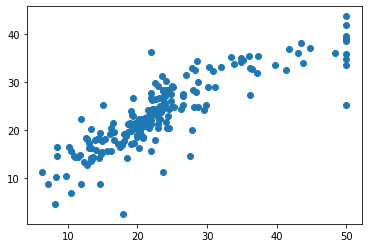

In [188]:
plt.scatter(y_test, predictions)

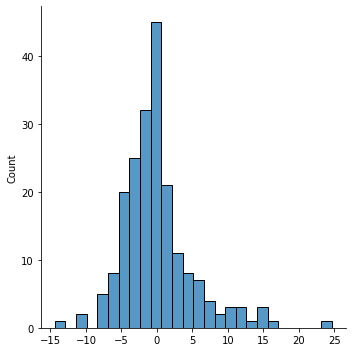

In [191]:
sns.displot((y_test-predictions))

In [193]:
metrics.mean_absolute_error(y_test, predictions)

3.469434757128037

In [194]:
metrics.mean_squared_error(y_test, predictions)

25.20577470236672

In [195]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.020535300380501